In [5]:
import noise
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

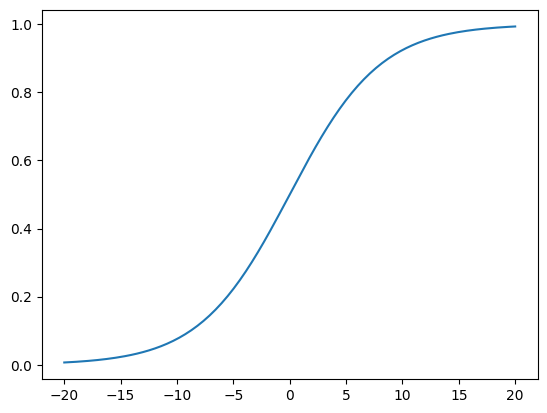

In [6]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-0.25*x))

xs = []
ys = []

steps = np.linspace(-20,20,150)

for i in steps:
    xs.append(i)
    ys.append(sigmoid(i))

plt.plot(xs,ys)

[[19. 17. 16. ... 10. 10. 11.]
 [ 8. 19. 17. ... 10. 10. 11.]
 [ 6.  8. 19. ... 10. 11. 11.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


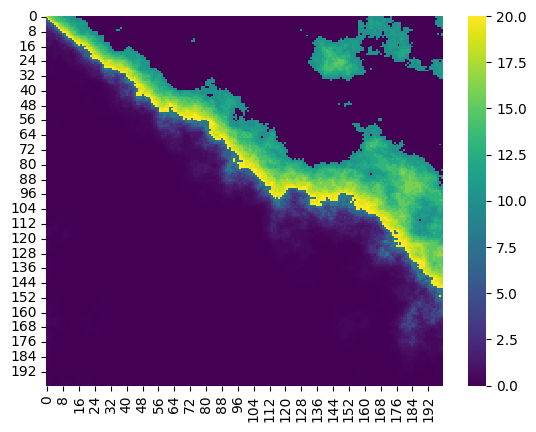

In [7]:
n = 40000

shape = (int(np.sqrt(n)),int(np.sqrt(n)))
scale = 350.0
octaves = 60
persistence = 0.6
lacunarity = 2

world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=50) # 42 good, 12 linear, # 33 good

world = np.around(np.interp(world, (world.min(), world.max()), (0,50)),0)

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-0.5*x))

for i in range(len(world)):
    for j in range(len(world)):
        if world[i][j] > 20:
            world[i][j] = world[i][j] - world[i][j] * sigmoid(world[i][j]- 20)
        elif world[i][j] < 10:
            world[i][j] = 0
        else:
            world[i][j] = world[i][j]

sns.heatmap(world,cmap='viridis')
print(np.around(world))